# Homework:
A person throws a ball upwards at a speed of 10m/s, please calculate the trajectory using Runge-Katta method and plot height(z) vs time(t)

We are given the velocity $v_0$=$10m/s$ and the acceleration $a$ = $-9.81m/s^2$ we can begin with a set of time from $0$ to $10$ seconds

In [2]:
import numpy as np
import matplotlib.pyplot as plt

t = np.linspace(0,10)


We now that the height is related by the kinematic equation:
$$
y = y_0 + v_0 t + \frac{1}{2}at^2
$$
However, we want to apply the Runge-Kutta method to calculate the height analytically

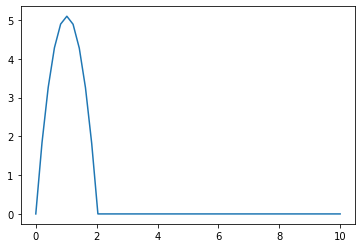

In [4]:
#For verification, we can map the function using the equation
import matplotlib.pyplot as plt

y = 10*t-1/2*9.81*(t)**2
y[y<0] = 0 #Ball hits the ground

plt.plot(t,y)
plt.show()

Now we implement the RK4 method; it is clear we must apply this twice:

1. First we map the height by

$$
y_{n+1} = y_n + \frac{1}{6}(k_1+2k_2+2k_3+k_4)
$$
such that
$$
k_1 = h*f(t,y)
$$
$$
k_2 = h*f(t+h/2,y+k1/2)
$$
$$
k_3 = h*f(t+h/2,y+k2/2)
$$
$$
k_4 = h*f(t+h/2,y+k3/2)
$$

We also recall that 

$$
f(t,y) = (y(t_{n+1}) - y(t_n))/h
$$

for $n$ first-order differential equations. Now we can apply the Runge-Kutta method.

$$
y = y_0 + v_0 t + \frac{1}{2}at^2
$$

where

$$
\frac{dy}{dt} = v_{0} + at = v
$$

and

$$
\frac{dv}{dt} = -9.81
$$

So in this case, $y[0]= y$ and $y[1] = v_y$ 

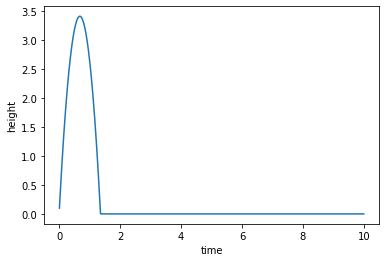

In [68]:
y = [0,10] #y, v_y
n = 2
t = 0
h = .01
    
def f(t,y):
    a = -9.81
    f_l = np.empty(2)
    f_l[0] = y[1] + 1/2*a*t #dy/dt
    f_l[1] = a #dv/dt
    return f_l
    
def rk4(t,h,y):
    k1=h*f(t,y)
    k2=h*f(t+0.5*h,y+0.5*k1)
    k3=h*f(t+0.5*h,y+0.5*k2)
    k4=h*f(t+0.5*h,y+0.5*k3)
    y+= 1/6*(k1+2*k2+2*k3+k4)
    #print(k1.shape)
    #print("Distance, Velocity): ",y)
    #print("Time: ",t)
    return y 

    
height =np.empty(0)
time = np.empty(0)
while(t<10):
    if((t+h)>10):
        h=10-t
    y = rk4(t,h,y)
    height =np.append(height,y[0])
    time = np.append(time, t)
    t = t+h
    
height = height.reshape((height.shape[0],1))
height[height<0] = 0

plt.plot(time, height)
plt.xlabel("time")
plt.ylabel("height")
plt.show()

In [ ]:
# Launching a Rocket using the Running Kruger